## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from functions import *
from sklearn.cluster import KMeans

## Import des fichiers

In [2]:
pop = pd.read_csv('population.csv')
prot = pd.read_csv('protéines.csv')
trend = pd.read_csv('tendance.csv')
produit = pd.read_csv('volaille.csv')
eco = pd.read_csv('pib.csv')
stab = pd.read_csv('stabilité.csv')

## Nettoyage de données

In [3]:
pop = pop.pivot_table(index= ['Zone', 'Année'], columns= 'Élément', values= 'Valeur')
pop.rename(columns = {'Population totale' : 'population'}, inplace=True)
pop.reset_index(inplace=True)
pop['population'] *= 1000
pop.head()

Élément,Zone,Année,population
0,Afghanistan,2012,31161376.0
1,Afghanistan,2017,36296113.0
2,Afrique du Sud,2012,52832658.0
3,Afrique du Sud,2017,57009756.0
4,Albanie,2012,2914096.0


In [4]:
pop2012 = pop[pop['Année']== 2012]
pop2012 = pop2012.reset_index()
pop2017 = pop[pop['Année']== 2017]
pop2017 = pop2017.reset_index()

In [5]:
pop2012

Élément,index,Zone,Année,population
0,0,Afghanistan,2012,31161376.0
1,2,Afrique du Sud,2012,52832658.0
2,4,Albanie,2012,2914096.0
3,6,Algérie,2012,37383895.0
4,8,Allemagne,2012,80972628.0
...,...,...,...,...
232,464,Îles Salomon,2012,556063.0
233,466,Îles Turques-et-Caïques,2012,34066.0
234,468,Îles Vierges américaines,2012,105534.0
235,470,Îles Vierges britanniques,2012,28650.0


In [6]:
pop = pd.merge(pop2017, pop2012, on= 'Zone')
pop

Élément,index_x,Zone,Année_x,population_x,index_y,Année_y,population_y
0,1,Afghanistan,2017,36296113.0,0,2012,31161376.0
1,3,Afrique du Sud,2017,57009756.0,2,2012,52832658.0
2,5,Albanie,2017,2884169.0,4,2012,2914096.0
3,7,Algérie,2017,41389189.0,6,2012,37383895.0
4,9,Allemagne,2017,82658409.0,8,2012,80972628.0
...,...,...,...,...,...,...,...
232,465,Îles Salomon,2017,636039.0,464,2012,556063.0
233,467,Îles Turques-et-Caïques,2017,37115.0,466,2012,34066.0
234,469,Îles Vierges américaines,2017,104751.0,468,2012,105534.0
235,471,Îles Vierges britanniques,2017,29577.0,470,2012,28650.0


In [7]:
pop.rename(columns={'Année_x' : 'Année', 'population_x' : 'population_2017', 'Année_y' : 'année_comparaison', 'population_y' : 'population_2012'}, inplace=True)
pop = pop[['Zone', 'Année', 'population_2017', 'année_comparaison', 'population_2012']]
pop['evol_pop'] = pop['population_2017'] / pop['population_2012'] * 100 - 100
pop

/tmp/ipykernel_335/1389277738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['evol_pop'] = pop['population_2017'] / pop['population_2012'] * 100 - 100


Élément,Zone,Année,population_2017,année_comparaison,population_2012,evol_pop
0,Afghanistan,2017,36296113.0,2012,31161376.0,16.477889
1,Afrique du Sud,2017,57009756.0,2012,52832658.0,7.906280
2,Albanie,2017,2884169.0,2012,2914096.0,-1.026974
3,Algérie,2017,41389189.0,2012,37383895.0,10.713956
4,Allemagne,2017,82658409.0,2012,80972628.0,2.081915
...,...,...,...,...,...,...
232,Îles Salomon,2017,636039.0,2012,556063.0,14.382543
233,Îles Turques-et-Caïques,2017,37115.0,2012,34066.0,8.950273
234,Îles Vierges américaines,2017,104751.0,2012,105534.0,-0.741941
235,Îles Vierges britanniques,2017,29577.0,2012,28650.0,3.235602


In [8]:
prot

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,55.7,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,10.7,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,83.7,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,36.0,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,3,Albanie,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,116.7,F,Estimation FAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,FS,Données de la sécurité alimentaire,249,Yémen,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,9.0,F,Estimation FAO,NaN
342,FS,Données de la sécurité alimentaire,251,Zambie,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,59.3,F,Estimation FAO,NaN
343,FS,Données de la sécurité alimentaire,251,Zambie,6123,Valeur,21014,Disponibilités protéines moyennes d’origine an...,20162018,2016-2018,g/personne/jour,12.0,F,Estimation FAO,NaN
344,FS,Données de la sécurité alimentaire,181,Zimbabwe,6123,Valeur,21013,Disponibilités protéiques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,43.3,F,Estimation FAO,NaN


In [9]:
prot['Année'] = pd.to_numeric(prot['Année'].str[0:4])+1
prot = prot.pivot_table(index=['Zone', 'Année'], values= 'Valeur', columns= 'Produit')
prot.rename(columns = {'Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)' : 'dispo_alim_animal',
                      'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)' : 'dispo_alim_total'}, inplace=True)
prot = prot.rename_axis(None, axis=1)
prot['ratio_dispo_alim'] = prot['dispo_alim_animal'] / prot['dispo_alim_total']
prot.reset_index(inplace=True)
prot

,Zone,Année,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim
0,Afghanistan,2017,10.7,55.7,0.192101
1,Afrique du Sud,2017,36.0,83.7,0.430108
2,Albanie,2017,62.7,116.7,0.537275
3,Algérie,2017,25.6,92.3,0.277356
4,Allemagne,2017,63.0,104.3,0.604027
...,...,...,...,...,...
168,Émirats arabes unis,2017,50.7,111.7,0.453894
169,Équateur,2017,30.3,65.7,0.461187
170,États-Unis d'Amérique,2017,72.7,112.7,0.645075
171,Éthiopie,2017,6.0,65.7,0.091324


In [10]:
produit

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,5.00,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,FBS,Bilans Alimentaires (2014-),181,Zimbabwe,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,6.00,Im,Données de la FAO basées sur une méthodologie ...
1177,FBS,Bilans Alimentaires (2014-),181,Zimbabwe,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,Im,Données de la FAO basées sur une méthodologie ...
1178,FBS,Bilans Alimentaires (2014-),181,Zimbabwe,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,75.00,S,Données standardisées
1179,FBS,Bilans Alimentaires (2014-),181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,18.00,Fc,Donnée calculée


In [11]:
produit = produit.pivot_table(index= ['Zone', 'Année'], values= 'Valeur', columns= 'Élément')
produit.drop(columns= 'Variation de stock', inplace=True)
produit.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)' : 'dispo_kcal_alim',
                          'Disponibilité de protéines en quantité (g/personne/jour)' : 'dispo_g_prot',
                          'Disponibilité intérieure' : 'dispo_int',
                          'Exportations - Quantité' : 'exportations',
                          'Importations - Quantité' : 'importations'}, inplace=True)
produit = produit.rename_axis(None, axis=1)
produit.reset_index(inplace=True)
produit

,Zone,Année,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production
0,Afghanistan,2017,5.0,0.56,57.0,NaN,29.0,28.0
1,Afrique du Sud,2017,149.0,14.68,2116.0,63.0,514.0,1665.0
2,Albanie,2017,59.0,4.44,33.0,0.0,20.0,13.0
3,Algérie,2017,25.0,2.26,304.0,0.0,2.0,297.0
4,Allemagne,2017,67.0,7.39,1557.0,646.0,842.0,1514.0
...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,2017,150.0,15.24,480.0,31.0,465.0,47.0
170,Équateur,2017,87.0,6.45,340.0,0.0,0.0,340.0
171,États-Unis d'Amérique,2017,220.0,19.98,18305.0,3692.0,123.0,21914.0
172,Éthiopie,2017,2.0,0.23,72.0,NaN,1.0,71.0


In [12]:
eco

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.701336,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44552.061000,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,MK,Indicateurs macro,236,Venezuela (République bolivarienne du),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,8429.074575,X,Sources internationales sûres,NaN
207,MK,Indicateurs macro,237,Viet Nam,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,2365.521494,X,Sources internationales sûres,NaN
208,MK,Indicateurs macro,249,Yémen,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,745.087909,X,Sources internationales sûres,NaN
209,MK,Indicateurs macro,251,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1534.874627,X,Sources internationales sûres,NaN


In [13]:
eco = eco.pivot_table(index= ['Zone', 'Année'], values= 'Valeur', columns= ['Produit'])
eco.rename(columns= {'Produit Intérieur Brut' : "pib_hab"}, inplace=True)
eco = eco.rename_axis(None, axis=1)
eco.reset_index(inplace=True)
eco

,Zone,Année,pib_hab
0,Afghanistan,2017,513.085978
1,Afrique du Sud,2017,6121.876572
2,Albanie,2017,4514.204908
3,Algérie,2017,4109.701336
4,Allemagne,2017,44552.061000
...,...,...,...
206,Îles Cook,2017,19741.188968
207,Îles Marshall,2017,3578.315150
208,Îles Salomon,2017,1911.431453
209,Îles Turques-et-Caïques,2017,27546.005658


In [14]:
trend

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l’élevage,2,Afghanistan,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,2.04,Fc,Donnée calculée
1,EK,Tendances dans l’élevage,202,Afrique du Sud,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,12.28,Fc,Donnée calculée
2,EK,Tendances dans l’élevage,3,Albanie,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,10.54,Fc,Donnée calculée
3,EK,Tendances dans l’élevage,4,Algérie,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,21.30,Fc,Donnée calculée
4,EK,Tendances dans l’élevage,79,Allemagne,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,7.99,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,EK,Tendances dans l’élevage,236,Venezuela (République bolivarienne du),7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,8.70,Fc,Donnée calculée
192,EK,Tendances dans l’élevage,237,Viet Nam,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,19.00,Fc,Donnée calculée
193,EK,Tendances dans l’élevage,249,Yémen,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,15.00,Fc,Donnée calculée
194,EK,Tendances dans l’élevage,251,Zambie,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,14.42,Fc,Donnée calculée


In [15]:
trend = trend.pivot_table(index= ['Zone', 'Année'], values= 'Valeur', columns= ['Élément'])
trend.rename(columns = {'Part du total des animaux' : 'elevage_poulet'}, inplace=True)
trend = trend.rename_axis(None, axis=1)
trend.reset_index(inplace=True)
trend

,Zone,Année,elevage_poulet
0,Afghanistan,2017,2.04
1,Afrique du Sud,2017,12.28
2,Albanie,2017,10.54
3,Algérie,2017,21.30
4,Allemagne,2017,7.99
...,...,...,...
191,Érythrée,2017,0.66
192,États-Unis d'Amérique,2017,13.97
193,Éthiopie,2017,1.42
194,Îles Cook,2017,4.09


In [16]:
stab

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.59,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-1.25,X,Sources internationales sûres,NaN
193,FS,Données de la sécurité alimentaire,237,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.29,X,Sources internationales sûres,NaN
194,FS,Données de la sécurité alimentaire,249,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Sources internationales sûres,NaN
195,FS,Données de la sécurité alimentaire,251,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Sources internationales sûres,NaN


In [17]:
stab = stab.pivot_table(index= ['Zone', 'Année'], values= 'Valeur', columns= ['Produit'])
stab.rename(columns = {'Stabilité politique et absence de violence/terrorisme (indice)' : 'indice_stab_pol'}, inplace=True)
stab = stab.rename_axis(None, axis=1)
stab.reset_index(inplace=True)
stab

,Zone,Année,indice_stab_pol
0,Afghanistan,2017,-2.80
1,Afrique du Sud,2017,-0.28
2,Albanie,2017,0.38
3,Algérie,2017,-0.92
4,Allemagne,2017,0.59
...,...,...,...
192,Érythrée,2017,-0.73
193,États-Unis d'Amérique,2017,0.34
194,Éthiopie,2017,-1.68
195,Îles Marshall,2017,0.87


In [18]:
data = pop.merge(prot, on= ['Zone', 'Année']) \
        .merge(trend, on= ['Zone', 'Année']) \
        .merge(produit, on= ['Zone', 'Année']) \
        .merge(eco, on= ['Zone', 'Année']) \
        .merge(stab, on= ['Zone', 'Année'])

data['Année'] = pd.to_numeric(data['Année'], errors= 'coerce')
data['année_comparaison'] = pd.to_numeric(data['année_comparaison'], errors= 'coerce')

data = data.set_index('Zone')
data

,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol
Zone,,,,,,,,,,,,,,,,,
Afghanistan,2017,36296113.0,2012,31161376.0,16.477889,10.7,55.7,0.192101,2.04,5.0,0.56,57.0,NaN,29.0,28.0,513.085978,-2.80
Afrique du Sud,2017,57009756.0,2012,52832658.0,7.906280,36.0,83.7,0.430108,12.28,149.0,14.68,2116.0,63.0,514.0,1665.0,6121.876572,-0.28
Albanie,2017,2884169.0,2012,2914096.0,-1.026974,62.7,116.7,0.537275,10.54,59.0,4.44,33.0,0.0,20.0,13.0,4514.204908,0.38
Algérie,2017,41389189.0,2012,37383895.0,10.713956,25.6,92.3,0.277356,21.30,25.0,2.26,304.0,0.0,2.0,297.0,4109.701336,-0.92
Allemagne,2017,82658409.0,2012,80972628.0,2.081915,63.0,104.3,0.604027,7.99,67.0,7.39,1557.0,646.0,842.0,1514.0,44552.061000,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2017,9487203.0,2012,9141596.0,3.780598,50.7,111.7,0.453894,21.42,150.0,15.24,480.0,31.0,465.0,47.0,40644.804043,0.62
Équateur,2017,16785361.0,2012,15474101.0,8.473901,30.3,65.7,0.461187,31.67,87.0,6.45,340.0,0.0,0.0,340.0,6213.501276,-0.07
États-Unis d'Amérique,2017,325084756.0,2012,314043885.0,3.515710,72.7,112.7,0.645075,13.97,220.0,19.98,18305.0,3692.0,123.0,21914.0,60116.568493,0.34


In [19]:
data.describe()

,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol
count,166.0,1.660000e+02,166.0,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,136.000000,165.000000,166.000000,166.000000,166.000000
mean,2017.0,3.567525e+07,2012.0,3.345616e+07,6.994240,36.525301,81.118675,0.420600,18.651566,74.162651,7.081446,580.704819,126.808824,88.569697,622.156627,13950.262157,-0.067169
std,0.0,1.125686e+08,0.0,1.064153e+08,6.491904,20.719982,20.867535,0.160086,20.655735,62.527696,5.711824,1734.538427,510.680831,187.051194,2112.761542,19530.220855,0.903852
min,2017.0,5.204500e+04,2012.0,4.988700e+04,-7.030485,6.000000,40.700000,0.091324,0.060000,1.000000,0.140000,2.000000,0.000000,0.000000,0.000000,359.232443,-2.940000
25%,2017.0,2.987040e+06,2012.0,2.946962e+06,2.218435,18.400000,64.075000,0.278228,5.862500,18.250000,1.795000,32.250000,0.000000,3.000000,15.250000,1923.908097,-0.627500
50%,2017.0,9.815582e+06,2012.0,9.479929e+06,6.006106,35.000000,81.300000,0.427917,11.650000,62.000000,6.440000,90.500000,2.500000,16.000000,68.500000,5697.325160,-0.020000
75%,2017.0,3.078268e+07,2012.0,2.913322e+07,11.543693,52.000000,96.750000,0.559530,22.185000,103.750000,9.825000,337.500000,29.500000,82.000000,355.750000,16033.007594,0.650000
max,2017.0,1.338677e+09,2012.0,1.265780e+09,33.387345,103.000000,143.300000,0.730534,100.000000,258.000000,27.820000,18305.000000,4223.000000,1069.000000,21914.000000,108431.931751,1.590000


In [20]:
data[data.index== 'Inde']

,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol
Zone,,,,,,,,,,,,,,,,,
Inde,2017,1.338677e+09,2012,1.265780e+09,5.75902,14.0,62.3,0.224719,4.26,7.0,0.74,2957.0,4.0,0.0,3526.0,1961.338029,-0.76


In [21]:
data.isna().any()

Année                False
population_2017      False
année_comparaison    False
population_2012      False
evol_pop             False
dispo_alim_animal    False
dispo_alim_total     False
ratio_dispo_alim     False
elevage_poulet       False
dispo_kcal_alim      False
dispo_g_prot         False
dispo_int            False
exportations          True
importations          True
Production           False
pib_hab              False
indice_stab_pol      False
dtype: bool

In [22]:
data.isna().sum()

Année                 0
population_2017       0
année_comparaison     0
population_2012       0
evol_pop              0
dispo_alim_animal     0
dispo_alim_total      0
ratio_dispo_alim      0
elevage_poulet        0
dispo_kcal_alim       0
dispo_g_prot          0
dispo_int             0
exportations         30
importations          1
Production            0
pib_hab               0
indice_stab_pol       0
dtype: int64

In [23]:
data[data['exportations'].isnull() == True]

,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol
Zone,,,,,,,,,,,,,,,,,
Afghanistan,2017,36296113.0,2012,31161376.0,16.477889,10.7,55.7,0.192101,2.04,5.0,0.56,57.0,NaN,29.0,28.0,513.085978,-2.80
Bahamas,2017,381755.0,2012,363584.0,4.997745,52.3,81.3,0.643296,89.33,220.0,19.71,21.0,NaN,26.0,7.0,32719.152336,0.99
Burkina Faso,2017,19193234.0,2012,16571253.0,15.822467,11.0,78.7,0.139771,4.28,8.0,0.85,48.0,NaN,0.0,48.0,734.996282,-0.93
Cabo Verde,2017,537498.0,2012,505235.0,6.385741,26.0,70.0,0.371429,17.74,62.0,6.53,10.0,NaN,12.0,1.0,3292.638357,0.77
Cambodge,2017,16009409.0,2012,14780454.0,8.314731,18.7,65.3,0.286371,4.35,11.0,0.73,37.0,NaN,10.0,27.0,1385.260419,0.09
Cuba,2017,11339254.0,2012,11257104.0,0.729761,33.0,86.0,0.383721,6.64,99.0,8.53,326.0,NaN,312.0,29.0,8541.214440,0.65
Gambie,2017,2213889.0,2012,1905013.0,16.213853,15.7,64.7,0.242658,4.38,12.0,1.24,8.0,NaN,16.0,2.0,679.778473,-0.08
Grenade,2017,110874.0,2012,107446.0,3.190440,39.7,71.3,0.556802,32.21,185.0,14.71,8.0,NaN,7.0,1.0,10152.836673,1.01
Guinée,2017,12067519.0,2012,10652031.0,13.288433,11.0,57.3,0.191972,7.12,7.0,0.73,25.0,NaN,37.0,15.0,855.575057,-0.70


In [24]:
data.sort_values(by= 'exportations', ascending=False).head(20)

,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol
Zone,,,,,,,,,,,,,,,,,
Brésil,2017,207833823.0,2012,199287299.0,4.288544,52.7,94.0,0.560638,7.81,203.0,15.47,9902.0,4223.0,3.0,14168.0,9925.419442,-0.42
États-Unis d'Amérique,2017,325084756.0,2012,314043885.0,3.515710,72.7,112.7,0.645075,13.97,220.0,19.98,18305.0,3692.0,123.0,21914.0,60116.568493,0.34
Pays-Bas,2017,17021347.0,2012,16791840.0,1.366777,68.3,105.0,0.650476,13.14,55.0,6.74,289.0,1418.0,608.0,1099.0,48989.638816,0.92
Pologne,2017,37953180.0,2012,38227044.0,-0.716414,57.0,104.3,0.546500,21.02,118.0,14.05,1327.0,1025.0,55.0,2325.0,13872.466907,0.52
Thaïlande,2017,69209810.0,2012,67835962.0,2.025250,26.7,62.3,0.428571,32.39,48.0,4.47,1006.0,796.0,2.0,1788.0,6578.190858,-0.75
Chine - RAS de Hong-Kong,2017,7306322.0,2012,7046848.0,3.682129,95.7,131.0,0.730534,23.50,182.0,19.67,227.0,663.0,907.0,24.0,46705.027813,0.83
Belgique,2017,11419748.0,2012,11085358.0,3.016502,58.3,98.7,0.590679,6.76,39.0,3.92,155.0,656.0,312.0,463.0,44020.066762,0.43
Allemagne,2017,82658409.0,2012,80972628.0,2.081915,63.0,104.3,0.604027,7.99,67.0,7.39,1557.0,646.0,842.0,1514.0,44552.061000,0.59
France,2017,64842509.0,2012,63564221.0,2.011018,63.7,108.7,0.586017,10.27,90.0,8.67,1563.0,501.0,506.0,1750.0,38720.645922,0.28


In [25]:
data['exportations'].fillna(data['exportations'].mean(), inplace=True)
data['importations'].fillna(data['importations'].mean(), inplace=True)

## Analyse univariée

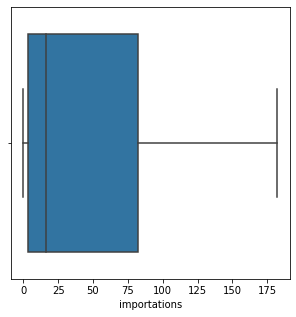

In [26]:
# distribution univariée des importations
plt.figure(figsize= (5,5))
axe = sns.boxplot(x= data['importations'], data=data, showfliers=False)
plt.show()

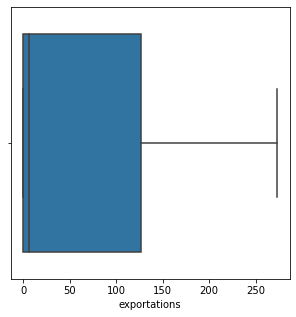

In [27]:
# distribution univariée des exportations
plt.figure(figsize= (5,5))
axe = sns.boxplot(x= data['exportations'], data=data, showfliers=False)
plt.show()

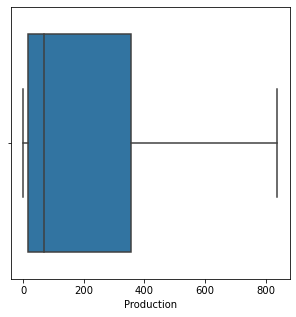

In [28]:
# distribution univariée des productions
plt.figure(figsize= (5,5))
axe = sns.boxplot(x= data['Production'], data=data, showfliers=False)
plt.show()

(array([ 4., 25., 41., 42., 17., 27.,  7.,  2.,  0.,  1.]),
 array([-7.03048456, -2.98870164,  1.05308129,  5.09486422,  9.13664714,
        13.17843007, 17.220213  , 21.26199592, 25.30377885, 29.34556178,
        33.3873447 ]),
 <BarContainer object of 10 artists>)

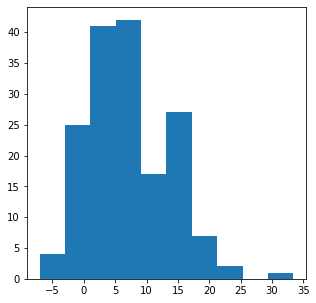

In [29]:
#distribution univariée de l'évolution de la population
plt.figure(figsize=(5,5))
plt.hist(x= data['evol_pop'])

<AxesSubplot:xlabel='ratio_dispo_alim', ylabel='Proportion'>

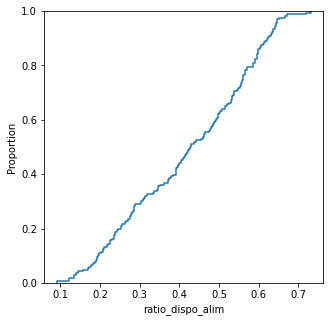

In [30]:
#distribution univariée du ratio de disponibilité alimentaire
plt.figure(figsize=(5,5))
sns.ecdfplot(x= data['ratio_dispo_alim'])

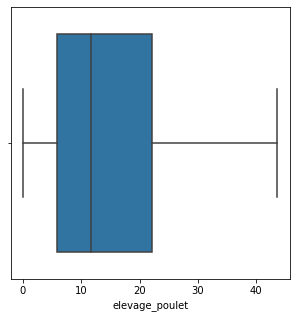

In [31]:
#distribution univariée du % d'élevage de poulet
plt.figure(figsize=(5,5))
axe = sns.boxplot(x= data['elevage_poulet'], data=data, showfliers=False)
plt.show()

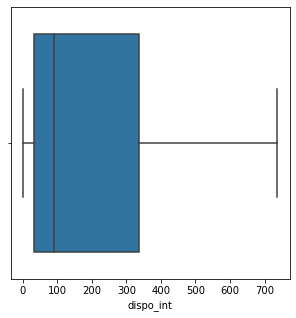

In [32]:
#distribution univariée de la disponibilité intérieure
plt.figure(figsize=(5,5))
axe = sns.boxplot(x= data['dispo_int'], data=data, showfliers=False)
plt.show()

<AxesSubplot:xlabel='pib_hab', ylabel='Proportion'>

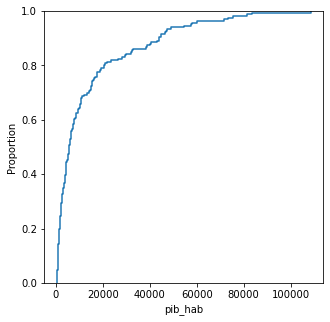

In [33]:
#distribution univariée du PIB par habitant
plt.figure(figsize=(5,5))
sns.ecdfplot(x= data['pib_hab'])

<AxesSubplot:xlabel='indice_stab_pol'>

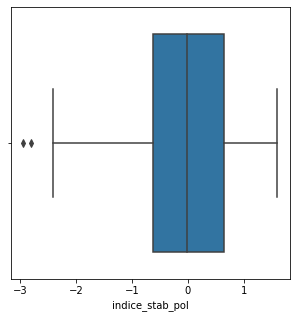

In [34]:
# distribution univariéé de la stabilité politique
plt.figure(figsize=(5,5))
sns.boxplot(x= data['indice_stab_pol'])

In [35]:
# distribution dispo_kcal_alim
# distribution dispo_g_alim

## Analyse bivariée

In [36]:
data_num = data[['population_2017', 'evol_pop', 'dispo_alim_animal', 'dispo_alim_total', 'ratio_dispo_alim',
       'elevage_poulet', 'dispo_kcal_alim', 'dispo_g_prot', 'dispo_int',
       'exportations', 'importations', 'Production', 'pib_hab',
       'indice_stab_pol']]
data_num.corr()

,population_2017,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol
population_2017,1.000000,-0.007428,-0.093482,-0.053495,-0.122765,-0.052383,-0.075204,-0.085122,0.409098,0.204718,0.066262,0.400424,-0.042453,-0.194279
evol_pop,-0.007428,1.000000,-0.554421,-0.481047,-0.576228,-0.044026,-0.346977,-0.366931,-0.110258,-0.114743,-0.109138,-0.117206,-0.243214,-0.414762
dispo_alim_animal,-0.093482,-0.554421,1.000000,0.898298,0.935536,0.075106,0.600052,0.669806,0.199791,0.218173,0.274962,0.196569,0.747274,0.631513
dispo_alim_total,-0.053495,-0.481047,0.898298,1.000000,0.724821,0.045290,0.473435,0.560055,0.204062,0.186677,0.268357,0.192411,0.666169,0.461078
ratio_dispo_alim,-0.122765,-0.576228,0.935536,0.724821,1.000000,0.148045,0.665794,0.701615,0.173558,0.191802,0.235430,0.172995,0.650512,0.675773
elevage_poulet,-0.052383,-0.044026,0.075106,0.045290,0.148045,1.000000,0.422060,0.413900,-0.006022,-0.068553,0.000139,-0.014665,0.047082,0.093106
dispo_kcal_alim,-0.075204,-0.346977,0.600052,0.473435,0.665794,0.422060,1.000000,0.972237,0.290573,0.233243,0.156586,0.278664,0.353393,0.436937
dispo_g_prot,-0.085122,-0.366931,0.669806,0.560055,0.701615,0.413900,0.972237,1.000000,0.270006,0.216878,0.205117,0.254938,0.429299,0.457518
dispo_int,0.409098,-0.110258,0.199791,0.204062,0.173558,-0.006022,0.290573,0.270006,1.000000,0.804568,0.215609,0.988764,0.167626,-0.043594
exportations,0.204718,-0.114743,0.218173,0.186677,0.191802,-0.068553,0.233243,0.216878,0.804568,1.000000,0.131591,0.868306,0.177208,0.030411


/tmp/ipykernel_335/1112016809.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data_num.corr(), dtype= np.bool))


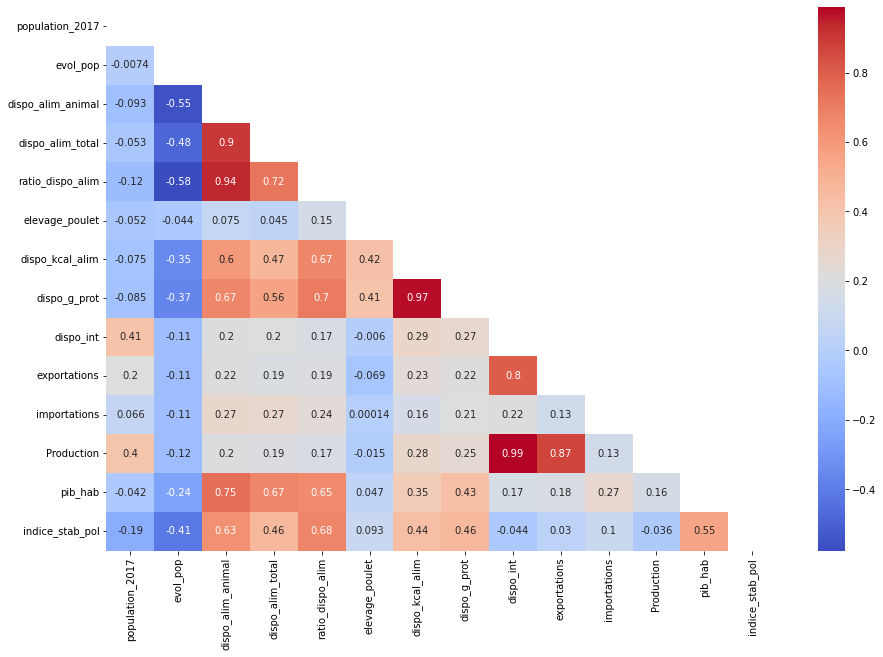

In [95]:
# heatmap
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(data_num.corr(), dtype= np.bool))
sns.heatmap(data_num.corr(), mask=mask, cmap= 'coolwarm', annot=True)
plt.savefig('heatmap_corr_var.jpg')
plt.show()

### Potentielles corrélations

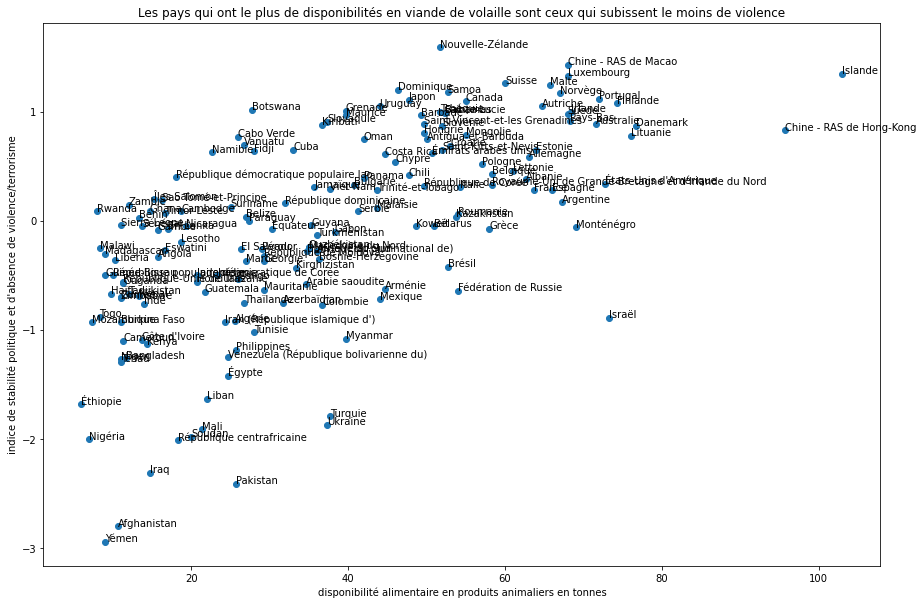

In [96]:
# disponibilité alimentaire en pdt animaux et stabilité politique
## je voudrais ne pas faire paraître tous les pays pour les annotations
plt.figure(figsize=(15,10))
plt.plot(data['dispo_alim_animal'], data['indice_stab_pol'], 'o')
annotations = data.index
plt.xlabel('disponibilité alimentaire en produits animaliers en tonnes')
plt.ylabel('indice de stabilité politique et d\'absence de violence/terrorisme')
plt.title('Les pays qui ont le plus de disponibilités en viande de volaille sont ceux qui subissent le moins de violence')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.dispo_alim_animal[i], data.indice_stab_pol[i]))

plt.savefig('corr_dispo_alim_stab_pol.jpg')
plt.show()

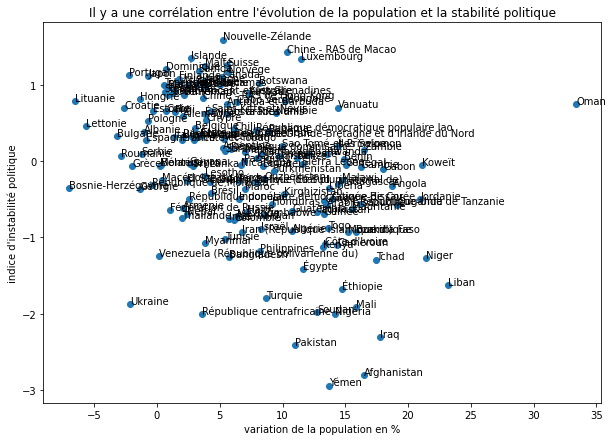

In [39]:
# population et stabilité politique
plt.figure(figsize=(10,7))
plt.plot(data['evol_pop'], data['indice_stab_pol'], 'o')
plt.xlabel('variation de la population en %')
plt.ylabel('indice d\'instabilité politique')
plt.title('Il y a une corrélation entre l\'évolution de la population et la stabilité politique')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.evol_pop[i], data.indice_stab_pol[i]))
plt.show()

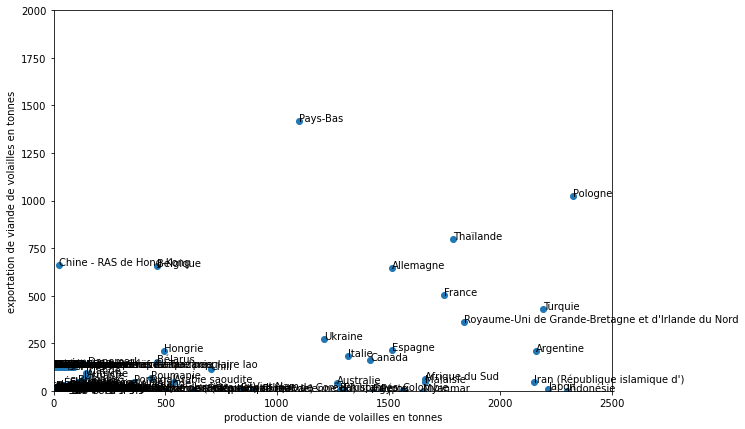

In [40]:
# production et exportation
## je voudrais exclure les "outliers"
plt.figure(figsize=(10,7))
plt.plot(data['Production'], data['exportations'], 'o')
plt.axis([0, 2500, 0, 2000])
plt.xlabel('production de viande de volailles en tonnes')
plt.ylabel('exportation de viande de volailles en tonnes')
plt.title('')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.Production[i], data.exportations[i]))
plt.show()

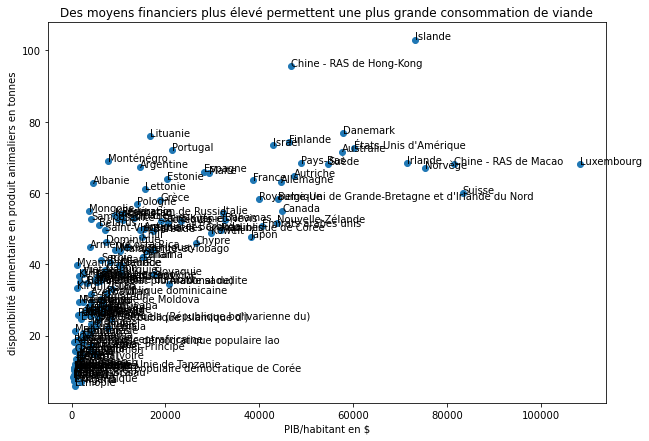

In [41]:
# PIB/hab et dispo alimentaire de produits animaux
plt.figure(figsize=(10,7))
plt.plot(data['pib_hab'], data['dispo_alim_animal'], 'o')
plt.xlabel('PIB/habitant en $')
plt.ylabel('disponibilité alimentaire en produit animaliers en tonnes')
plt.title('Des moyens financiers plus élevé permettent une plus grande consommation de viande')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.pib_hab[i], data.dispo_alim_animal[i]))
plt.show()

##### Conclusion des potentielles corrélations

In [42]:
print('Il y a une corrélation entre l\'évolution de la population et la stabilité politique')
print('La disponibilité en disponibilité en viande de volaill et la stabilité politique sont corrélées')
print('')
print('Il y a une corrélation entre le PIB/habitant et la disponibilité en viande de volaille')

Il y a une corrélation entre l'évolution de la population et la stabilité politique
La disponibilité en disponibilité en viande de volaill et la stabilité politique sont corrélées

Il y a une corrélation entre le PIB/habitant et la disponibilité en viande de volaille


### Manque de corrélation évidente

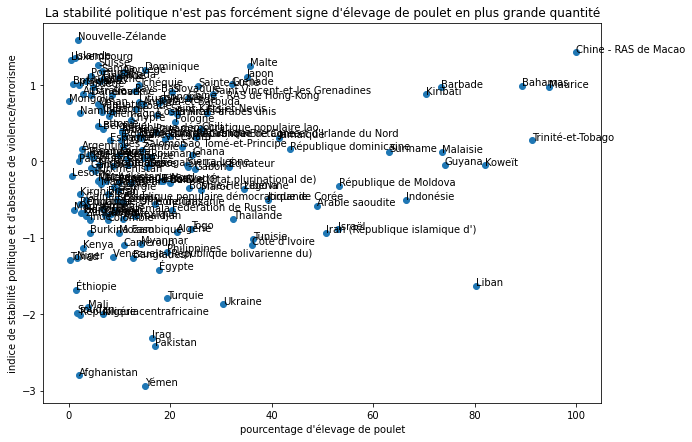

In [43]:
# stabilité politique et % de poulet dans l'élevage
plt.figure(figsize=(10,7))
plt.plot(data['elevage_poulet'], data['indice_stab_pol'], 'o')
plt.xlabel('pourcentage d\'élevage de poulet')
plt.ylabel('indice de stabilité politique et d\'absence de violence/terrorisme')
plt.title('La stabilité politique n\'est pas forcément signe d\'élevage de poulet en plus grande quantité')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.elevage_poulet[i], data.indice_stab_pol[i]))
plt.show()

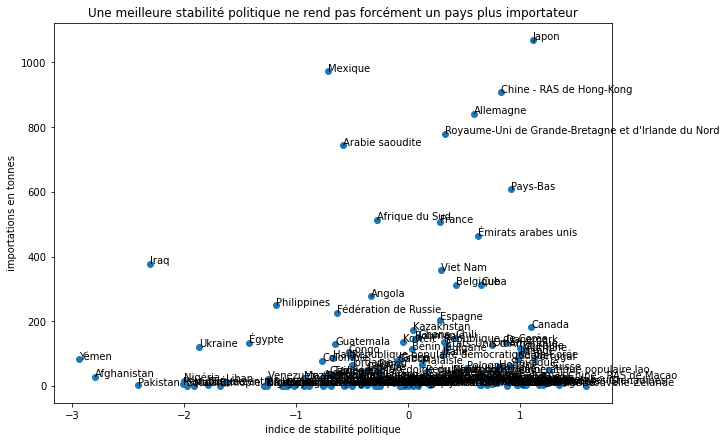

In [44]:
# stabilité politique et importation
plt.figure(figsize=(10,7))
plt.plot(data['indice_stab_pol'], data['importations'], 'o')
plt.xlabel('indice de stabilité politique')
plt.ylabel('importations en tonnes')
plt.title('Une meilleure stabilité politique ne rend pas forcément un pays plus importateur')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.indice_stab_pol[i], data.importations[i]))
plt.show()

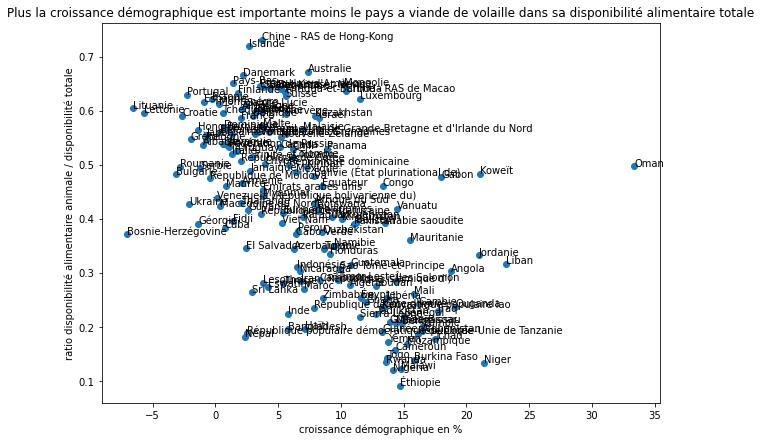

In [97]:
# croissance démographique et ratio disponibilité alimentaire animale / disponibilité totale
plt.figure(figsize=(10,7))
plt.plot(data['evol_pop'], data['ratio_dispo_alim'], 'o')
plt.xlabel('croissance démographique en %')
plt.ylabel('ratio disponibilité alimentaire animale / disponibilité totale')
plt.title('Plus la croissance démographique est importante moins le pays a viande de volaille dans sa disponibilité alimentaire totale')
for i, label in enumerate(annotations):
    plt.annotate(label, (data.evol_pop[i], data.ratio_dispo_alim[i]))
    
plt.savefig('negative_corr_dispo_alim_demographie.jpg')
plt.show()

##### Conclusion des variables non corrélées

In [46]:
print('La stabilité politique et le pourcentage d\'élevage de poulet ne sont pas corrélées')
print('La stabilité politique et importations ne sont pas corrélées')
print('La croissance démographique et le part de viande de volaille dans la disponibilité alimentaire totale sont corrélées \nnégativement')

La stabilité politique et le pourcentage d'élevage de poulet ne sont pas corrélées
La stabilité politique et importations ne sont pas corrélées
La croissance démographique et le part de viande de volaille dans la disponibilité alimentaire totale sont corrélées 
négativement


In [47]:
print(data.columns)

Index(['Année', 'population_2017', 'année_comparaison', 'population_2012',
       'evol_pop', 'dispo_alim_animal', 'dispo_alim_total', 'ratio_dispo_alim',
       'elevage_poulet', 'dispo_kcal_alim', 'dispo_g_prot', 'dispo_int',
       'exportations', 'importations', 'Production', 'pib_hab',
       'indice_stab_pol'],
      dtype='object')


## Analyse en Composantes Principales (ACP)

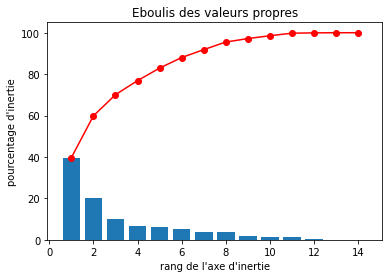

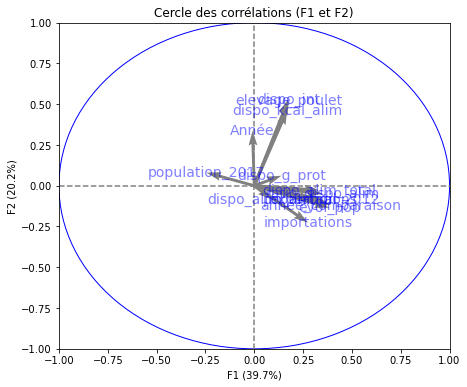

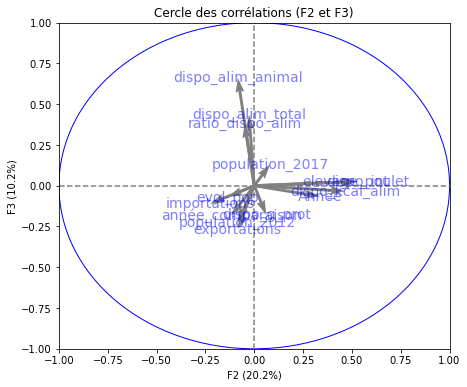

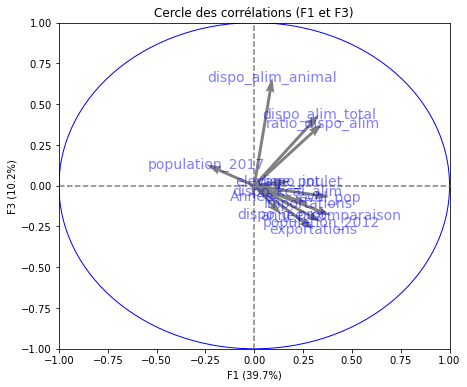

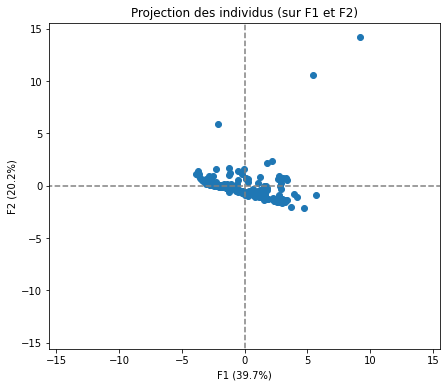

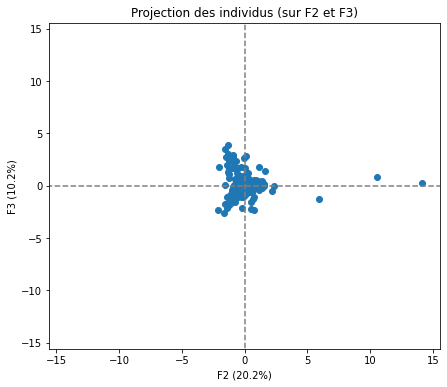

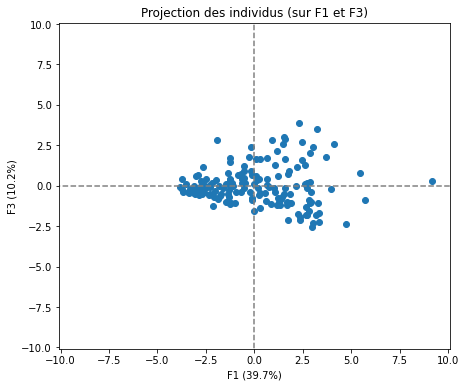

<Figure size 432x288 with 0 Axes>

In [98]:
n_comp = 14

# préparation des données pour l'ACP
X = data[['population_2017', 'evol_pop', 'dispo_alim_animal', 'dispo_alim_total', 'ratio_dispo_alim',
       'elevage_poulet', 'dispo_kcal_alim', 'dispo_g_prot', 'dispo_int',
       'exportations', 'importations', 'Production', 'pib_hab',
       'indice_stab_pol']]
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(1,2),(0,2)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)])

plt.savefig('acp.jpg')
plt.show()


In [49]:
print(pca.explained_variance_ratio_)

[3.96867424e-01 2.01654994e-01 1.02142792e-01 6.78971971e-02
 6.06487610e-02 5.08556660e-02 3.81427187e-02 3.67007795e-02
 1.67614197e-02 1.37695098e-02 1.22720876e-02 1.51321986e-03
 7.10693599e-04 6.27374803e-05]


In [89]:
projection_X = pca.transform(X_scaled)
projection_X

array([[-3.85802639e+00,  1.13644739e+00, -1.05990326e-01, ...,
        -8.04408351e-04,  8.77412499e-02, -2.94478134e-02],
       [ 1.20639280e+00,  8.75935954e-01,  5.73984403e-01, ...,
         1.00450943e-01, -7.14679757e-02, -2.33898596e-02],
       [ 1.18224929e+00, -1.06750735e+00, -1.21301803e+00, ...,
        -2.20010922e-01,  1.81691419e-01,  6.04319413e-04],
       ...,
       [ 9.16731710e+00,  1.41503928e+01,  2.98728176e-01, ...,
         1.88105862e-01,  7.99048183e-02, -3.10530057e-02],
       [-3.67276996e+00,  1.12684769e+00, -3.78332016e-01, ...,
        -5.02511606e-02,  5.35688290e-02, -3.03330113e-02],
       [-2.45688631e+00, -6.38369365e-02, -9.61188370e-02, ...,
         4.00260138e-02,  4.99897287e-02,  1.82941395e-02]])

In [90]:
# Seules les 3 premières composantes sont gardées
projection_X = pd.DataFrame({'composante_1' : projection_X[:,0],
                           'composante_2' : projection_X[:,1],
                           'composante_3' : projection_X[:,2]},
                          columns= ['composante_1', 'composante_2', 'composante_3'])
projection_X

,composante_1,composante_2,composante_3
0,-3.858026,1.136447,-0.105990
1,1.206393,0.875936,0.573984
2,1.182249,-1.067507,-1.213018
3,-1.634264,0.189430,-0.147977
4,3.053086,0.717471,-2.292343
...,...,...,...
161,2.712720,-0.902383,-0.161450
162,-0.525899,-0.294580,0.901502
163,9.167317,14.150393,0.298728
164,-3.672770,1.126848,-0.378332


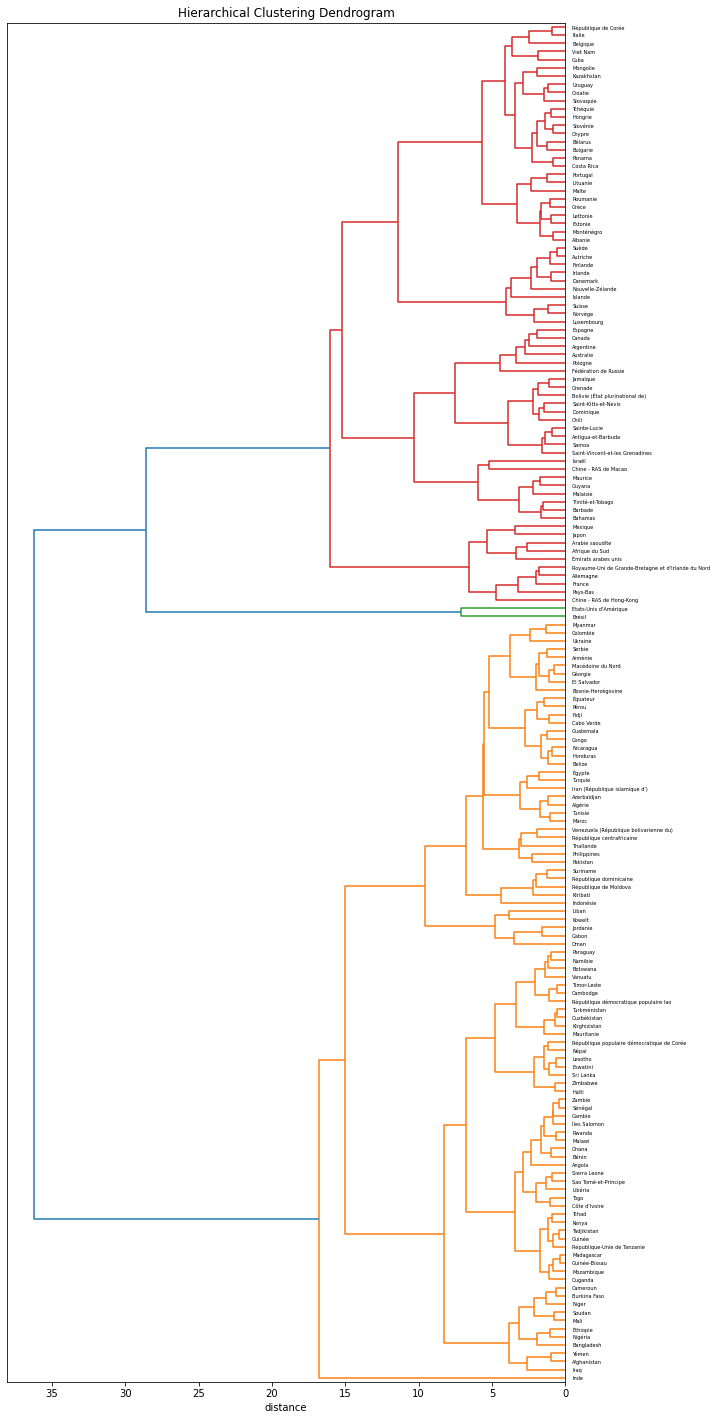

<Figure size 432x288 with 0 Axes>

In [99]:
# dendogramme
# préparation des données pour le clustering
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

plt.savefig('dendrogram.jpg')

In [123]:
clusters_rank = pd.DataFrame({'Zone' : names, 'cluster': clusters})

In [124]:
clusters_rank

,Zone,cluster
0,Afghanistan,1
1,Afrique du Sud,4
2,Albanie,5
3,Algérie,1
4,Allemagne,4
...,...,...
161,Émirats arabes unis,4
162,Équateur,1
163,États-Unis d'Amérique,3
164,Éthiopie,1


In [55]:
#index triés des groupes
idg = np.argsort(clusters)
idg_df = pd.DataFrame(data.index[idg], clusters[idg])
idg_df

,Zone
1,Afghanistan
1,Paraguay
1,Pakistan
1,Ouzbékistan
1,Ouganda
...,...
5,Roumanie
5,Portugal
5,Hongrie
5,Luxembourg


In [56]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X)
label

array([0, 0, 3, 0, 4, 0, 3, 0, 0, 3, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 3, 3, 0, 4, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 4,
       0, 3, 3, 3, 0, 3, 4, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 0, 3, 3, 4, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3, 0, 3, 0, 0, 2,
       3, 3, 3, 4, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 0, 3,
       3, 0, 4, 0, 3, 3, 4, 3, 3, 2, 4, 3], dtype=int32)

In [57]:
import sklearn.datasets
from sklearn.datasets import make_blobs

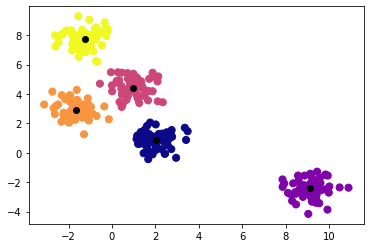

In [66]:
x, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black')

In [59]:
# coordonnées centroïdes
print(centers)

[[-1.24268927  7.75317247]
 [ 9.12239104 -2.42822185]
 [ 2.00401597  0.84371973]
 [-1.66877007  2.91652498]
 [ 0.96475862  4.4261437 ]]


In [73]:
df_centers = pd.DataFrame(centers)
df_centers

,0,1
0,2.004016,0.843720
1,9.122391,-2.428222
2,0.964759,4.426144
3,-1.668770,2.916525
4,-1.242689,7.753172


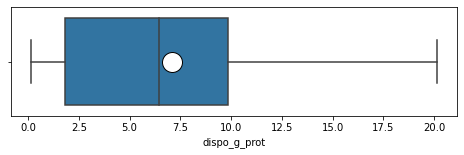

In [119]:
meanprops = {"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"20"}
plt.figure(figsize=(8,2))
sns.boxplot(data=data, x='dispo_g_prot', showfliers=False, showmeans=True, meanprops=meanprops)
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Test d'ANOVA
sample_df = df.sample(75)
model = smf.ols('dispo_proteines ~ cluster', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p = anova_table['PR(>F)'][0]
print('ANOVA\np-value :', p, '\nstat (F) :', anova_table['F'][0])
if p > 0.05:
    print('H0: the means of the samples are equal.')
else:
    print('H1: one or more of the means of the samples are unequal.'
         '\n\nConditions :'
         '\n1. Normalité des résidus\n2. Homoscédasticité')

In [120]:
from scipy.stats import kstest

#Hypothèse H0 : la disponibilité en Kcal suit une distribution gaussienne

print(kstest(X_scaled[:,0],'norm'))

#La p-value est largement inférieure au seuil de 5%. L'hypothèse H0 est rejetée.

KstestResult(statistic=0.37546424564719644, pvalue=1.5878861294886828e-21)


In [126]:
select_cluster = pd.merge(data, clusters_rank, on='Zone')
select_cluster

,Zone,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol,cluster
0,Afghanistan,2017,36296113.0,2012,31161376.0,16.477889,10.7,55.7,0.192101,2.04,5.0,0.56,57.0,126.808824,29.0,28.0,513.085978,-2.80,1
1,Afrique du Sud,2017,57009756.0,2012,52832658.0,7.906280,36.0,83.7,0.430108,12.28,149.0,14.68,2116.0,63.000000,514.0,1665.0,6121.876572,-0.28,4
2,Albanie,2017,2884169.0,2012,2914096.0,-1.026974,62.7,116.7,0.537275,10.54,59.0,4.44,33.0,0.000000,20.0,13.0,4514.204908,0.38,5
3,Algérie,2017,41389189.0,2012,37383895.0,10.713956,25.6,92.3,0.277356,21.30,25.0,2.26,304.0,0.000000,2.0,297.0,4109.701336,-0.92,1
4,Allemagne,2017,82658409.0,2012,80972628.0,2.081915,63.0,104.3,0.604027,7.99,67.0,7.39,1557.0,646.000000,842.0,1514.0,44552.061000,0.59,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Émirats arabes unis,2017,9487203.0,2012,9141596.0,3.780598,50.7,111.7,0.453894,21.42,150.0,15.24,480.0,31.000000,465.0,47.0,40644.804043,0.62,4
162,Équateur,2017,16785361.0,2012,15474101.0,8.473901,30.3,65.7,0.461187,31.67,87.0,6.45,340.0,0.000000,0.0,340.0,6213.501276,-0.07,1
163,États-Unis d'Amérique,2017,325084756.0,2012,314043885.0,3.515710,72.7,112.7,0.645075,13.97,220.0,19.98,18305.0,3692.000000,123.0,21914.0,60116.568493,0.34,3
164,Éthiopie,2017,106399924.0,2012,92726985.0,14.745372,6.0,65.7,0.091324,1.42,2.0,0.23,72.0,126.808824,1.0,71.0,721.753494,-1.68,1


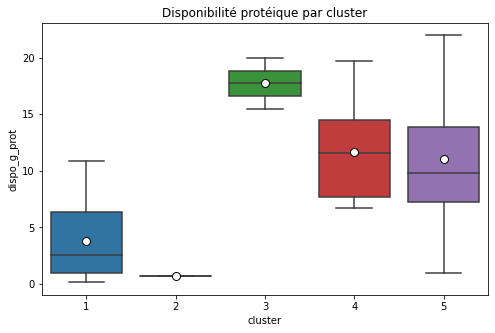

In [144]:
# disponibilité en protéines selon les clusters
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=select_cluster, y='dispo_g_prot', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Disponibilité protéique par cluster')
plt.savefig('clusters_boxplot_1.jpg')
plt.show()

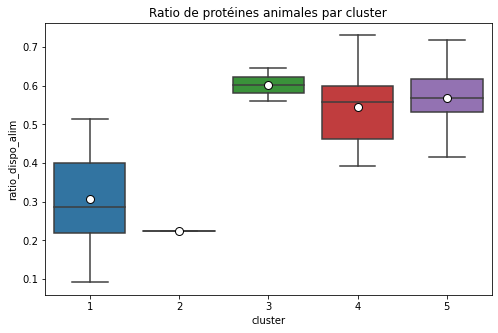

In [145]:
# part de protéines animales par cluster
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=select_cluster, y='ratio_dispo_alim', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Ratio de protéines animales par cluster')
plt.savefig('clusters_boxplot_2.jpg')
plt.show()

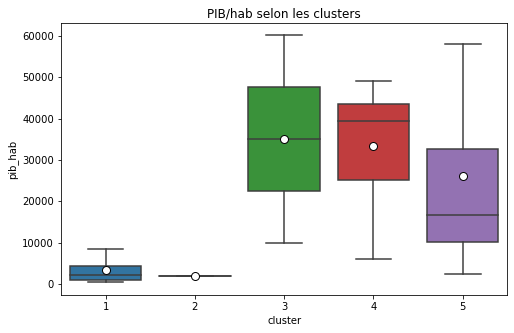

In [146]:
plt.figure(figsize=(8,5))
sns.color_palette('rainbow')
sns.boxplot(
    data=select_cluster, y='pib_hab', x='cluster', showfliers=False,
    showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('PIB/hab selon les clusters')
plt.savefig('clusters_boxplot_3.jpg')

plt.show()

In [142]:
# choix pays
select_cluster[select_cluster.cluster == 3]

,Zone,Année,population_2017,année_comparaison,population_2012,evol_pop,dispo_alim_animal,dispo_alim_total,ratio_dispo_alim,elevage_poulet,dispo_kcal_alim,dispo_g_prot,dispo_int,exportations,importations,Production,pib_hab,indice_stab_pol,cluster
21,Brésil,2017,207833823.0,2012,199287299.0,4.288544,52.7,94.0,0.560638,7.81,203.0,15.47,9902.0,4223.0,3.0,14168.0,9925.419442,-0.42,3
163,États-Unis d'Amérique,2017,325084756.0,2012,314043885.0,3.515710,72.7,112.7,0.645075,13.97,220.0,19.98,18305.0,3692.0,123.0,21914.0,60116.568493,0.34,3
